In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout



In [ ]:
file_path = 'content/selected_columns_s.txt'

with open(file_path, 'r') as file:
    selected_columns = [line.strip() for line in file]

print(selected_columns)

['gameid', 'playerid', 'plusminusPTS', 'estNETRTG', 'REBpct', 'estOFFRTG', 'DRB', 'FTM', 'uncontestedFGM', 'passes', 'ASTpct', 'touches', 'estUSGpct', 'oppPIP', 'TRB', 'oppFBPTS', 'PTS', 'estpace', 'FGpct', 'pie', 'DIST', 'defendedatrimFGA', 'BLK', '2ndPTS', 'TOVratio', 'pace', 'paceper40', '2ndAST', 'contestedFGA', 'OFFRTG', 'TSpct', 'FGM', '3Ppct', 'FTAST', 'STL', 'defendedatrimFGM', 'SEC', 'defendedatrimFGpct', 'oppPTSoffTOV', 'FBPTS', 'contestedFGM', '3PM', 'name', 'PIP', 'SPD', 'FTpct', 'PTSoffTOV', 'DEFRTG', 'team', 'home', 'win']


In [ ]:
df = pd.read_csv('content/LookingFoward_data_avg_d2_10.csv')

In [4]:
df[selected_columns]

,gameid,playerid,plusminusPTS,estNETRTG,REBpct,estOFFRTG,DRB,FTM,uncontestedFGM,passes,...,3PM,name,PIP,SPD,FTpct,PTSoffTOV,DEFRTG,team,home,win
0,22200001,1627759,0.0,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.000,0.00,0.0,0.00,0.0,0.0,TRUE
1,22200001,1628369,0.0,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.000,0.00,0.0,0.00,0.0,0.0,TRUE
2,22200001,201143,0.0,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.000,0.00,0.0,0.00,0.0,0.0,TRUE
3,22200001,1628401,0.0,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.000,0.00,0.0,0.00,0.0,0.0,TRUE
4,22200001,203935,0.0,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.000,0.00,0.0,0.00,0.0,0.0,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39595,52200211,1630544,-0.3,-16.23,0.0537,97.70,2.1,0.9,1.5,21.3,...,0.9,505,3.6,4.235,0.18,0.7,110.20,21.0,21.3,TRUE
39596,52200211,1630526,1.6,-12.99,0.0835,98.68,2.2,0.6,1.1,14.9,...,0.6,250,2.2,4.446,0.30,0.4,107.83,21.0,21.7,TRUE
39597,52200211,0,0.0,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.000,0.00,0.0,0.00,0.0,0.0,0
39598,52200211,0,0.0,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.000,0.00,0.0,0.00,0.0,0.0,0


In [ ]:
df[selected_columns].to_csv('content/Looki.csv', index=False)

In [6]:
data = df[selected_columns]

In [7]:
import pandas as pd


# 確認每個比賽有 30 行數據
num_rows_per_game = 30

# 初始化空列表來存放合併後的資料
merged_data = []

# 用range來遍歷資料集，每次處理30行
for i in range(0, len(data), num_rows_per_game):
    # 取出當前30行
    block = data.iloc[i:i+num_rows_per_game]

    # 取出第一行的gameid, home, win
    gameid = block['gameid'].iloc[0]
    win = block['win'].iloc[0]

    # 前15行為team, 後15行為opp_team
    team = block['team'].iloc[:15].unique()[0]  # 取出前15行的team (假設都是同一隊)
    opp_team = block['team'].iloc[15:].unique()[0]  # 取出後15行的team作為opp_team

    # 把gameid放在合併的第一個欄位
    row_data = [gameid]

    # 將30行展平成一行，跳過 gameid、team、home、win 這些欄位
    for _, row in block.iterrows():
        row_data.extend(row.drop(['gameid', 'team', 'win']))

    # 在最後添加 team, opp_team, home, win
    row_data.extend([team, opp_team, win])

    # 將展平的一行加入到結果列表
    merged_data.append(row_data)

# 創建合併後的DataFrame
merged_df = pd.DataFrame(merged_data)

# 為新DataFrame設置適當的欄位名稱
column_names = ['gameid']
for player_num in range(1, num_rows_per_game + 1):
    for col in data.columns:
        if col not in ['gameid', 'team', 'win']:  # 跳過這些欄位的名稱
            column_names.append(f'{col}_player_{player_num}')

# 添加 team, opp_team, home, win 的欄位名
column_names.extend(['team', 'opp_team', 'win'])

# 設定新的欄位名稱
merged_df.columns = column_names

# 保存合併後的資料為CSV
merged_df.to_csv('merged_roll_drop_flat.csv', index=False)

In [8]:
merged_df

,gameid,playerid_player_1,plusminusPTS_player_1,estNETRTG_player_1,REBpct_player_1,estOFFRTG_player_1,DRB_player_1,FTM_player_1,uncontestedFGM_player_1,passes_player_1,...,name_player_30,PIP_player_30,SPD_player_30,FTpct_player_30,PTSoffTOV_player_30,DEFRTG_player_30,home_player_30,team,opp_team,win
0,22200001,1627759,0.0,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRUE
1,22200002,203952,0.0,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRUE
2,22200003,1630180,0.0,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRUE
3,22200004,1627741,0.0,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FALSE
4,22200005,1629631,0.0,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,52200111,1628384,5.3,5.34,0.0610,115.16,2.8,0.9,5.3,29.1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,5.0,FALSE
1316,52200121,1629020,-1.5,0.59,0.0813,110.66,1.6,1.0,0.7,10.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,18.0,TRUE
1317,52200131,1630530,6.7,8.16,0.0366,116.85,2.2,4.4,5.3,24.6,...,0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,21.0,FALSE
1318,52200201,202710,-8.0,-12.82,0.0748,102.80,3.7,6.1,4.3,51.3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,5.0,TRUE


In [9]:
shape = 1444

In [10]:
merged_df = merged_df.drop(index=merged_df.index[:80])

In [11]:
merged_df

,gameid,playerid_player_1,plusminusPTS_player_1,estNETRTG_player_1,REBpct_player_1,estOFFRTG_player_1,DRB_player_1,FTM_player_1,uncontestedFGM_player_1,passes_player_1,...,name_player_30,PIP_player_30,SPD_player_30,FTpct_player_30,PTSoffTOV_player_30,DEFRTG_player_30,home_player_30,team,opp_team,win
80,22200081,203084,-8.00,-13.60,0.077500,105.750000,4.500000,3.5,1.50,33.750000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,16.0,TRUE
81,22200082,202330,-6.00,-11.22,0.074000,103.680000,4.400000,3.6,4.00,43.200000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,TRUE
82,22200083,201142,-12.80,-13.12,0.059000,107.520000,3.800000,9.4,5.40,32.600000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,FALSE
83,22200084,201942,-1.50,-1.90,0.050667,112.433333,3.166667,7.5,5.00,38.833333,...,0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,23.0,FALSE
84,22200085,1628960,10.75,15.30,0.063500,106.675000,3.500000,2.5,2.75,29.500000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,1.0,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,52200111,1628384,5.30,5.34,0.061000,115.160000,2.800000,0.9,5.30,29.100000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,5.0,FALSE
1316,52200121,1629020,-1.50,0.59,0.081300,110.660000,1.600000,1.0,0.70,10.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,18.0,TRUE
1317,52200131,1630530,6.70,8.16,0.036600,116.850000,2.200000,4.4,5.30,24.600000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,21.0,FALSE
1318,52200201,202710,-8.00,-12.82,0.074800,102.800000,3.700000,6.1,4.30,51.300000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,5.0,TRUE


In [12]:
# 將每場比賽中的所有球員數據合併成一個特徵向量
X = []
y = []

In [13]:
y = np.array(merged_df['win'])

# 勝負
y = np.where(y == 'TRUE', 1, 0)
y = to_categorical(y, 2)

In [14]:
X = np.array(merged_df.drop(columns=['win']))
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442
0,22200081.0,203084.0,-8.00,-13.60,0.077500,105.750000,4.500000,3.5,1.50,33.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,16.0
1,22200082.0,202330.0,-6.00,-11.22,0.074000,103.680000,4.400000,3.6,4.00,43.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0
2,22200083.0,201142.0,-12.80,-13.12,0.059000,107.520000,3.800000,9.4,5.40,32.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0
3,22200084.0,201942.0,-1.50,-1.90,0.050667,112.433333,3.166667,7.5,5.00,38.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,23.0
4,22200085.0,1628960.0,10.75,15.30,0.063500,106.675000,3.500000,2.5,2.75,29.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,52200111.0,1628384.0,5.30,5.34,0.061000,115.160000,2.800000,0.9,5.30,29.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,5.0
1236,52200121.0,1629020.0,-1.50,0.59,0.081300,110.660000,1.600000,1.0,0.70,10.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,18.0
1237,52200131.0,1630530.0,6.70,8.16,0.036600,116.850000,2.200000,4.4,5.30,24.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,21.0
1238,52200201.0,202710.0,-8.00,-12.82,0.074800,102.800000,3.700000,6.1,4.30,51.300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,5.0


In [15]:
Y = pd.DataFrame(y)

In [16]:
Y

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
1235,1.0,0.0
1236,0.0,1.0
1237,1.0,0.0
1238,0.0,1.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle = False)
X_train_df = pd.DataFrame(X_train)
# X_train_df.to_csv('content/X_trainA.csv', index=False)

In [18]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442
0,22200081.0,203084.0,-8.00,-13.60,0.077500,105.750000,4.500000,3.5,1.50,33.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,16.0
1,22200082.0,202330.0,-6.00,-11.22,0.074000,103.680000,4.400000,3.6,4.00,43.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0
2,22200083.0,201142.0,-12.80,-13.12,0.059000,107.520000,3.800000,9.4,5.40,32.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0
3,22200084.0,201942.0,-1.50,-1.90,0.050667,112.433333,3.166667,7.5,5.00,38.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,23.0
4,22200085.0,1628960.0,10.75,15.30,0.063500,106.675000,3.500000,2.5,2.75,29.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,22200944.0,1628966.0,-4.00,-8.12,0.082400,105.570000,4.300000,2.1,1.90,21.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,12.0
864,22200945.0,1628978.0,0.00,-2.34,0.043500,115.740000,2.000000,0.6,4.00,41.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,13.0
865,22200946.0,202330.0,-0.40,1.49,0.062900,112.050000,3.800000,3.1,4.90,26.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,22.0
866,22200947.0,1629631.0,-2.00,-3.64,0.068100,117.100000,3.500000,2.5,3.80,21.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.2


In [19]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442
868,22200949.0,202710.0,0.4,-0.02,0.0918,111.12,2.9,7.4,3.3,39.4,...,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,16.0,20.0
869,22200950.0,201942.0,5.5,9.08,0.0464,111.58,2.8,4.1,3.8,34.5,...,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,5.0,24.0
870,22200951.0,1629652.0,0.6,5.70,0.0687,122.26,2.2,2.6,3.6,20.4,...,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,21.0,29.0
871,22200952.0,1629008.0,10.4,16.56,0.0903,120.96,4.4,1.8,4.2,20.4,...,0.4,104.0,2.4,4.053,0.3,0.4,107.35,15.8,8.0,15.0
872,22200953.0,1628978.0,2.7,1.54,0.0543,116.74,2.4,0.6,3.8,42.6,...,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,10.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,52200111.0,1628384.0,5.3,5.34,0.0610,115.16,2.8,0.9,5.3,29.1,...,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,28.0,5.0
1236,52200121.0,1629020.0,-1.5,0.59,0.0813,110.66,1.6,1.0,0.7,10.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,14.0,18.0
1237,52200131.0,1630530.0,6.7,8.16,0.0366,116.85,2.2,4.4,5.3,24.6,...,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,19.0,21.0
1238,52200201.0,202710.0,-8.0,-12.82,0.0748,102.80,3.7,6.1,4.3,51.3,...,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,16.0,5.0


In [20]:
y_train

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
863,0.0,1.0
864,0.0,1.0
865,1.0,0.0
866,0.0,1.0


In [21]:
y_test

,0,1
868,1.0,0.0
869,1.0,0.0
870,0.0,1.0
871,0.0,1.0
872,0.0,1.0
...,...,...
1235,1.0,0.0
1236,0.0,1.0
1237,1.0,0.0
1238,0.0,1.0


In [22]:
from sklearn.preprocessing import MinMaxScaler
# 標準化
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
print(X_test)

[[1.00115340e+00 1.09644676e-03 5.26859504e-01 ... 0.00000000e+00
  5.33333333e-01 6.55172414e-01]
 [1.00230681e+00 5.59411611e-04 6.84917355e-01 ... 0.00000000e+00
  1.66666667e-01 7.93103448e-01]
 [1.00346021e+00 9.98906350e-01 5.33057851e-01 ... 0.00000000e+00
  7.00000000e-01 9.65517241e-01]
 ...
 [3.46021338e+04 9.99520305e-01 7.22107438e-01 ... 0.00000000e+00
  6.33333333e-01 6.89655172e-01]
 [3.46022145e+04 1.09644676e-03 2.66528926e-01 ... 0.00000000e+00
  5.33333333e-01 1.37931034e-01]
 [3.46022261e+04 9.98896561e-01 5.88842975e-01 ... 0.00000000e+00
  6.00000000e-01 6.89655172e-01]]


In [24]:
print(y_train)

       0    1
0    0.0  1.0
1    0.0  1.0
2    1.0  0.0
3    1.0  0.0
4    0.0  1.0
..   ...  ...
863  0.0  1.0
864  0.0  1.0
865  1.0  0.0
866  0.0  1.0
867  1.0  0.0

[868 rows x 2 columns]


In [25]:
X_shape = shape-1

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.layers import GRU, Conv1D, Attention
dropout_rate = 0.2

# Reshape the input data correctly
X_train = X_train.reshape(X_train.shape[0], 1, X_shape)  # (samples, time steps, features)
X_test = X_test.reshape(X_test.shape[0], 1, X_shape)    # (samples, time steps, features)

my_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(80, activation=tf.nn.tanh, return_sequences=True, input_shape=(1, X_shape)), # Correct input shape
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.LSTM(60, activation=tf.nn.tanh, return_sequences=True),
    tf.keras.layers.GRU(units=60, return_sequences=True),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.LSTM(40, activation=tf.nn.tanh),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(20, activation=tf.nn.sigmoid),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
my_model.fit(X_train, y_train, epochs=35, batch_size=32)

# 评估模型
loss, accuracy = my_model.evaluate(X_test, y_test, verbose=0)

print(f"模型准确性: {accuracy:.3f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/35
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4872 - loss: 0.7259
Epoch 2/35
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5648 - loss: 0.6969
Epoch 3/35
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5889 - loss: 0.6813
Epoch 4/35
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5343 - loss: 0.7121
Epoch 5/35
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5655 - loss: 0.7042
Epoch 6/35
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5280 - loss: 0.7217
Epoch 7/35
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6013 - loss: 0.6899
Epoch 8/35
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5864 - loss: 0.6806
Epoch 9/35
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5794 - loss: 0.6783
Epoch 10/35
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5480 - loss: 0.6854
Epoch 11/35
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5827 - loss: 0.6813
Epoch 12/35
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5744 - lo

In [27]:
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 80)               │         487,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 80)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 60)               │          33,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 1, 60)               │          21,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 60)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 40)                  │          16,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,681,508 (6.41 MB)

 Trainable params: 560,502 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,121,006 (4.28 MB)

In [ ]:
# 保存模型到指定的文件路徑
my_model.save('TENGRUmodel1.h5')

# 保存模型架構到 JSON 格式
model_json = my_model.to_json()
with open('my_model1.json', 'w') as json_file:
    json_file.write(model_json)

my_model.save('my_model1.keras')

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


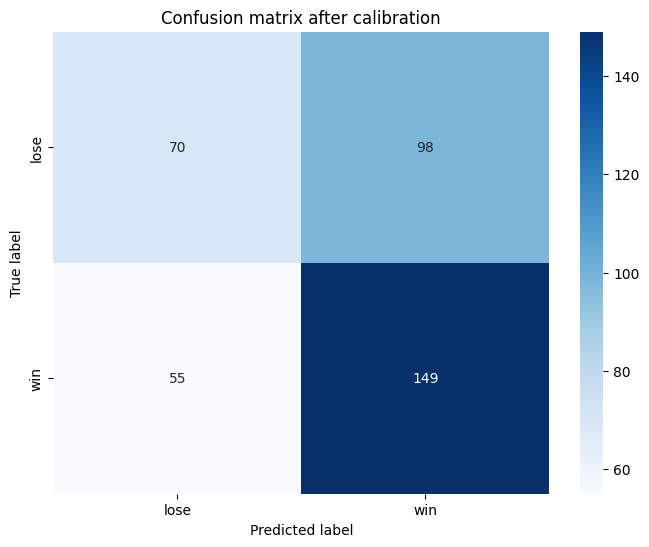

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
# 1. 使用模型進行預測
y_pred_probs = my_model.predict(X_test)  # 預測的機率
y_pred = np.argmax(y_pred_probs, axis=1)  # 將預測的機率轉換為類別

# 2. 確保 y_test 是標籤（如果它是 one-hot 編碼的，需要轉換）
if y_test.shape[1] > 1:  # 如果 y_test 是 one-hot 編碼
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

# 3. 計算混淆矩陣
cm = confusion_matrix(y_test_labels, y_pred)

# 4. 繪製混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["lose", "win"], yticklabels=["lose", "win"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix after calibration")
plt.show()


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss, accuracy_score, confusion_matrix
from sklearn.base import clone, BaseEstimator, ClassifierMixin # Import BaseEstimator and ClassifierMixin
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# ... (Your existing code for model creation and training) ...

# Update KerasClassifier to inherit from BaseEstimator and ClassifierMixin and implement clone method
class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
        self.classes_ = [0, 1]  # Add this line to define classes_

    def predict_proba(self, X):
        # Ensure X has the correct shape for the LSTM model
        X = X.reshape(X.shape[0], 1, X_shape)

        # Get raw predictions
        y_pred = self.model.predict(X)

        # Assuming binary classification, return probabilities
        return y_pred

    def predict(self, X):
        # Get probabilities
        probs = self.predict_proba(X)

        # Return the class with the highest probability
        return np.argmax(probs, axis=1)

    def fit(self, X, y):
        # This is a dummy fit method. The model is assumed to be already trained.
        # If you need to re-train, implement the logic here.
        # Manually set classes_ during fit
        self.classes_ = np.unique(y)  # Add this line
        pass

    def get_params(self, deep=True):
        # Return a dictionary of the model's parameters
        # (This may need to be adjusted depending on your specific TensorFlow model)
        return {}

    def set_params(self, **parameters):
        # Update the model's parameters
        # (This may need to be adjusted depending on your specific TensorFlow model)
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    # Implement the clone method for KerasClassifier
    def __sklearn_clone__(self, make_deep=False):
        """
        Since `clone` doesn't know how to handle custom classes like `KerasClassifier`,
        we implement a custom `__sklearn_clone__` method to handle the cloning process.

        This method creates a new instance of `KerasClassifier` with the same model.
        """
        new_classifier = type(self)(self.model) # Pass the model during instantiation
        return new_classifier

# ... (Your existing code for model creation and training) ...

# Now you can use the wrapper in CalibratedClassifierCV
keras_clf = KerasClassifier(my_model)

# Convert y_train to 1D for CalibratedClassifierCV
y_train_1d = np.argmax(y_train.values, axis=1)  # Assuming y_train is a DataFrame

calibrated_model = CalibratedClassifierCV(keras_clf, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train_1d)  # Use the 1D target array


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


CalibratedClassifierCV(cv=5, estimator=KerasClassifier())

In [31]:
# Now you can use the wrapper in CalibratedClassifierCV
keras_clf = KerasClassifier(my_model)

# Convert y_train to 1D for CalibratedClassifierCV
y_train_1d = np.argmax(y_train.values, axis=1)  # Assuming y_train is a DataFrame

calibrated_model = CalibratedClassifierCV(keras_clf, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train_1d)  # Use the 1D target array



# ... (Rest of your code) ...

# 獲取校準後的預測概率
y_prob_calibrated = calibrated_model.predict_proba(X_test)[:, 1]

# 進行預測並評估模型
y_pred_calibrated = calibrated_model.predict(X_test)

# Convert y_test to binary format if it's in multilabel-indicator format
# Assuming y_test is a DataFrame or a 2D NumPy array
y_test_binary = np.argmax(y_test.values, axis=1)
cm = confusion_matrix(y_test_binary, y_pred_calibrated)
# Now calculate accuracy with consistent formats
accuracy = accuracy_score(y_test_binary, y_pred_calibrated)
brier_score = brier_score_loss(y_test_binary, y_prob_calibrated) # y_prob_calibrated is expected to be for the positive class


print(f"校準後的準確率: {accuracy}")
print(f"Brier 損失分數: {brier_score}")



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
校準後的準確率: 0.5860215053763441
Brier 損失分數: 0.29733976161711295


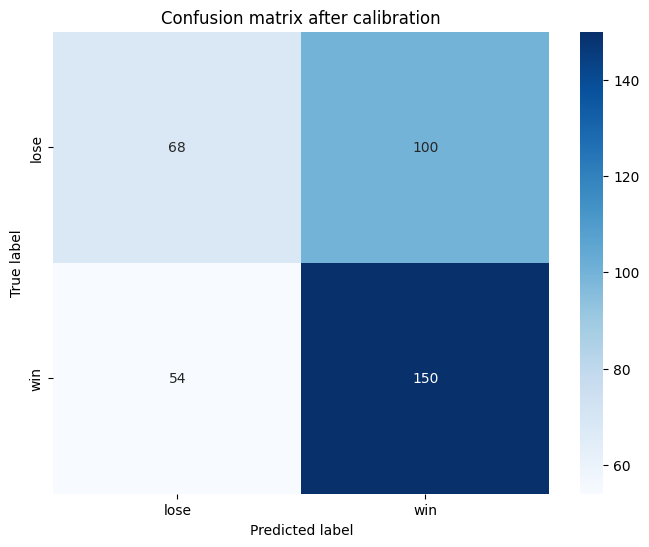

In [32]:
# 生成混淆矩陣

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["lose","win"], yticklabels=["lose","win"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix after calibration")
plt.show()

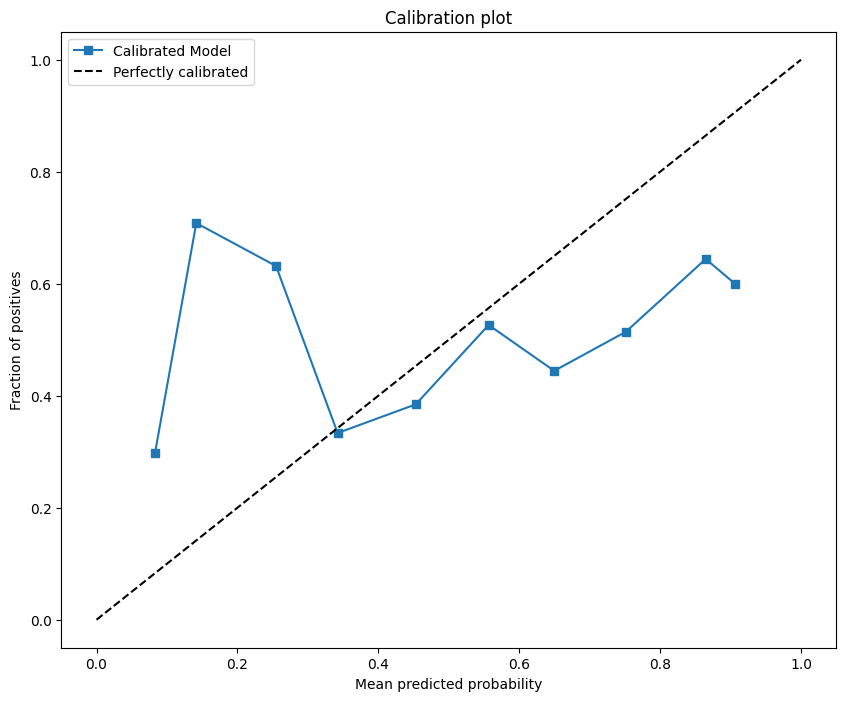

In [33]:
# 畫出校準曲線
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 8))
# ... (Rest of your code) ...

# Convert y_test to 1D for calibration_curve using argmax
y_test_1d = np.argmax(y_test.values, axis=1)  # Assuming y_test is a DataFrame or a 2D NumPy array

# Calculate calibration curve using the 1D version of y_test
fraction_of_positives, mean_predicted_value = calibration_curve(y_test_1d, y_prob_calibrated, n_bins=10)

# ... (Rest of your code) ...

plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Calibrated Model")
plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.legend()
plt.title("Calibration plot")
plt.show()

In [34]:
# 保存模型到指定的文件路徑
my_model.save('TENGRU_Cmodel.h5')

# 保存模型架構到 JSON 格式
model_json = my_model.to_json()
with open('my_model.json', 'w') as json_file:
    json_file.write(model_json)

my_model.save('my_model.keras')